**Final Project Topics/Goals:**<br>
-Find manageable data from public data sources to clean and prepare for analysis<br>
-Draw conclusions from analysis by observing trends/patterns and potential correlation betwen variables<br>

Data being used: Earthquakes in California from [Center for Engineering Strong Motion Data](https://www.strongmotioncenter.org/index.html) <br>

Data acquired from CESMD is for California and from the years 1925-2025<br>

**Data to help with analysis:**<br>
California latitude range 32deg 32'N : 42deg N<br>
California longitude range 114deg 8'W : 124deg 26'W<br>

**Segmenting latitudes:**<br>
Southern California northern cutoff = 35<br>
Central = 36.78 - 37.16<br>
Northern = 37.16 - 42<br>

**Data prep & Analysis to be done:**<br>
-observe amount of earthquakes per year.<br>
-Group magnitudes.<br>
-Segment latitudes by southern, central, northern.<br>
-Organize any string-type data to be easier to use.<br>
-Make decisions with respect to any blank or missing data.<br>
-Quakes per Region.<br>
    -Show subplots of quakes by magnitudes per region.<br>
-Observe trends betweeen magnitudes and locations.<br>
-Observe trends betweeen magnitudes and fault types.<br>



In [3]:
#importing libraries and data

import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

quakes = pd.read_csv('Summa2025-06-04.csv')
print(quakes.head())

#checking dataset
print(quakes.describe())
print(quakes.info())
print('NaN counts for Earthquake dataset: ')
print(quakes.isna().sum(),'\n')

    EventID                       IQRID                    Earthquake_Name  \
0  37904927  Aguanga_01Apr2018_37904927  Aguanga Earthquake of 01 Apr 2018   
1  38043999  Aguanga_01Sep2018_38043999  Aguanga Earthquake of 01 Sep 2018   
2  37638895  Aguanga_03May2017_37638895  Aguanga Earthquake of 03 May 2017   
3  37826343  Aguanga_09Dec2017_37826343  Aguanga Earthquake of 09 Dec 2017   
4  38245496  Aguanga_14Aug2018_38245496  Aguanga Earthquake of 14 Aug 2018   

   latitude  longitude  Magnitude    Origin Time (UTC) Seismic network  \
0   33.4925  -116.8045        3.4  2018-04-02 02:53:54              ci   
1   33.4878  -116.8065        3.1  2018-09-01 16:50:29              ci   
2   33.4838  -116.8010        3.4  2017-05-03 15:44:55              ci   
3   33.4987  -116.8007        3.5  2017-12-09 20:45:24              ci   
4   33.4772  -116.8033        4.4  2018-08-15 01:24:26              ci   

  faultType Country State  num_records  \
0        SS      US    CA           13   
1 

In [7]:
#creating new dataset by removing columns with hyperlinks
quakes_2 = quakes.drop(['IQRID', 'EventID','IQR_Link', 'USGS Event Link'], axis=1)
#print(quakes_2.head())

#creating re-organized column 'Earthquake_Name' by name
Earthquake_Name_split = quakes_2['Earthquake_Name'].str.split(' ')
quakes_2['Name_of_quake'] = Earthquake_Name_split.str.get(0) + ' ' + Earthquake_Name_split.str.get(1) 

#creating re-organized column 'Origin Time (UTC)' by day, month, and year
Time_split = quakes_2['Origin Time (UTC)'].str.split('-')
quakes_2['Day_long'] = Time_split.str.get(2)
quakes_2['Month'] = Time_split.str.get(1)
quakes_2['Year'] = Time_split.str.get(0)
day_split = quakes_2['Day_long'].str.split(' ')
quakes_2['Day'] = day_split.str.get(0)

print(quakes_2.head())


                     Earthquake_Name  latitude  longitude  Magnitude  \
0  Aguanga Earthquake of 01 Apr 2018   33.4925  -116.8045        3.4   
1  Aguanga Earthquake of 01 Sep 2018   33.4878  -116.8065        3.1   
2  Aguanga Earthquake of 03 May 2017   33.4838  -116.8010        3.4   
3  Aguanga Earthquake of 09 Dec 2017   33.4987  -116.8007        3.5   
4  Aguanga Earthquake of 14 Aug 2018   33.4772  -116.8033        4.4   

     Origin Time (UTC) Seismic network faultType Country State  num_records  \
0  2018-04-02 02:53:54              ci        SS      US    CA           13   
1  2018-09-01 16:50:29              ci        SS      US    CA            1   
2  2017-05-03 15:44:55              ci        SS      US    CA           21   
3  2017-12-09 20:45:24              ci        SS      US    CA            3   
4  2018-08-15 01:24:26              ci        SS      US    CA           45   

        Name_of_quake     Day_long Month  Year Day  
0  Aguanga Earthquake  02 02:53:54    0

In [8]:
#Adding column to categorize location by southern, central, and northern california
#Also grouping magnitudes to make it more visually appealing
#Segmenting latitudes:
#Southern California northern cutoff = 35
#Central = 35 - 37
#Northern = 37 - 42

min_lat = 31.5
max_lat = 41.5

region = []

for lat in quakes_2['latitude'] :
    if 31.4 < lat < 35 : 
        region.append('southern')
    elif 35 < lat < 37:
        region.append('central')
    elif 37 < lat < 42:
        region.append('northern')
    else :
        continue

mag_grouped = []

for mag in quakes_2['Magnitude'] :
    if 1 <= mag < 2 : 
        mag_grouped.append('1')
    elif 2 <= mag < 3:
        mag_grouped.append('2')
    elif 3 <= mag < 4:
        mag_grouped.append('3')
    elif 4 <= mag < 5:
        mag_grouped.append('4')    
    elif 5 <= mag < 6:
        mag_grouped.append('5')
    elif 6 <= mag < 7:
        mag_grouped.append('6')    
    elif 7 <= mag < 8:
        mag_grouped.append('7')
    else :
        continue
    
print('Rows in new region list :' + str(len(region)),'\n')
print('Rows in new magnitude list :' + str(len(mag_grouped)),'\n')

quakes_2['Region'] = region
quakes_2['Mag_groups'] = mag_grouped 
print(quakes_2.head())


Rows in new region list :2203 

Rows in new magnitude list :2203 

                     Earthquake_Name  latitude  longitude  Magnitude  \
0  Aguanga Earthquake of 01 Apr 2018   33.4925  -116.8045        3.4   
1  Aguanga Earthquake of 01 Sep 2018   33.4878  -116.8065        3.1   
2  Aguanga Earthquake of 03 May 2017   33.4838  -116.8010        3.4   
3  Aguanga Earthquake of 09 Dec 2017   33.4987  -116.8007        3.5   
4  Aguanga Earthquake of 14 Aug 2018   33.4772  -116.8033        4.4   

     Origin Time (UTC) Seismic network faultType Country State  num_records  \
0  2018-04-02 02:53:54              ci        SS      US    CA           13   
1  2018-09-01 16:50:29              ci        SS      US    CA            1   
2  2017-05-03 15:44:55              ci        SS      US    CA           21   
3  2017-12-09 20:45:24              ci        SS      US    CA            3   
4  2018-08-15 01:24:26              ci        SS      US    CA           45   

        Name_of_quake    

In [10]:
#counting amount of fault type data per region to see if any correlation tests can be performed using the fault type data
fault_count = quakes_2.groupby('Region').faultType.value_counts()
print('Amount of recorded earthquakes that have available fault type data:')
print(fault_count,'\n')

#counting quakes per region
quake_count = quakes_2.groupby('Region').Region.value_counts()
print('Amount of earthquakes recorded per region:')
print(quake_count,'\n')

#counting amount of magnitudes per region
mag_count = quakes_2.groupby('Mag_groups').Region.value_counts()
print('Magnitudes per region:','\n')
print(mag_count)

south_mag_count = quakes_2.Mag_groups[(quakes_2['Region'] == 'southern')].value_counts()
print('So-Cal magnitude count: ')
print(south_mag_count)

central_mag_count = quakes_2.Mag_groups[(quakes_2['Region'] == 'central')].value_counts()

north_mag_count = quakes_2.Mag_groups[(quakes_2['Region'] == 'northern')].value_counts()


Amount of recorded earthquakes that have available fault type data:
Region    faultType
central   SS           128
          ALL           26
          RS            15
          NM             7
          RO             4
          NO             2
northern  SS           124
          ALL           42
          NM            24
          RS             9
          NO             6
          RO             5
southern  SS           132
          ALL           21
          RS            19
          NM             4
          RO             4
          NO             3
Name: count, dtype: int64 

Amount of earthquakes recorded per region:
Region
central     574
northern    846
southern    783
Name: count, dtype: int64 

Magnitudes per region: 

Mag_groups  Region  
1           central       1
            northern      1
2           northern     43
            southern     17
            central       2
3           southern    553
            northern    505
            central     402
4 

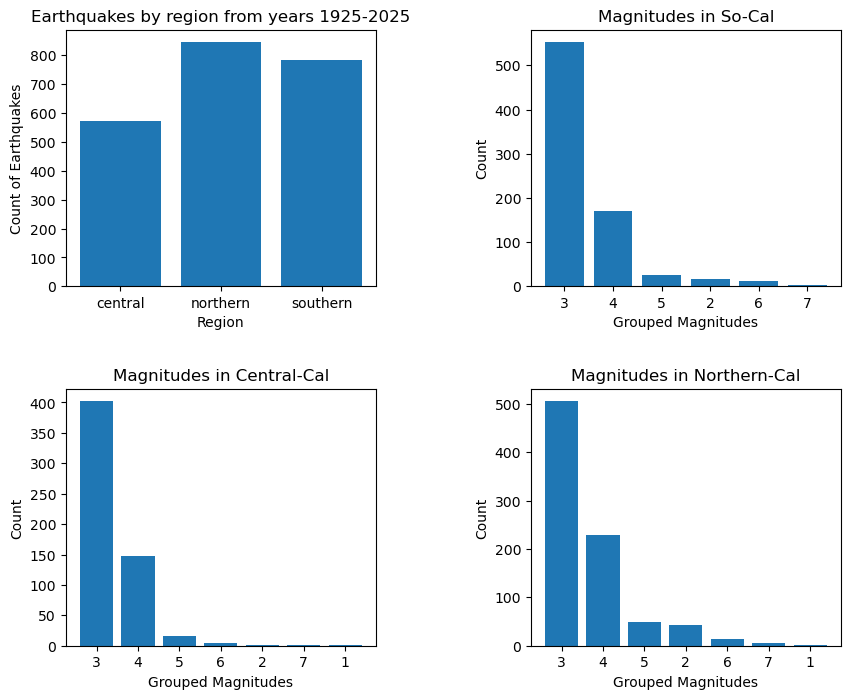

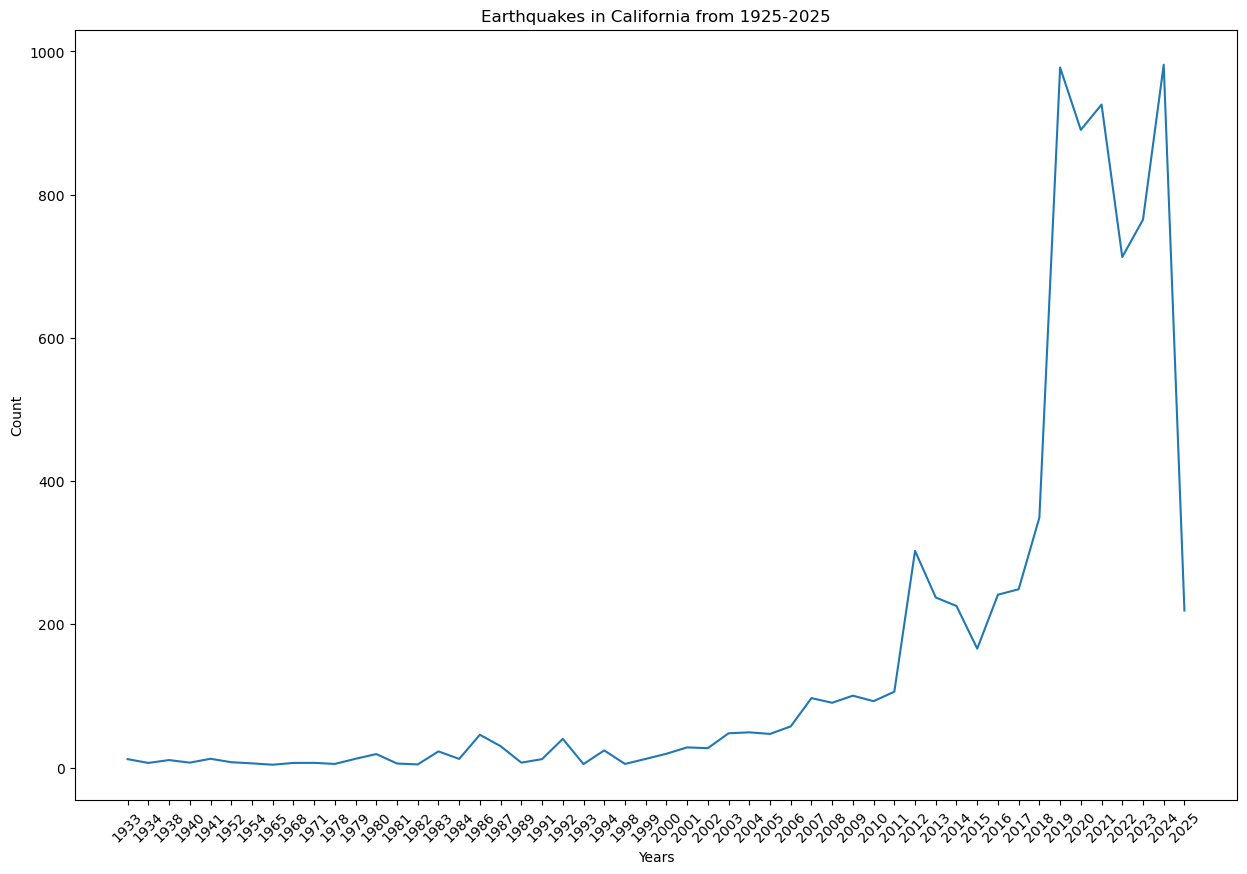

In [11]:
#plotting amount of earthquakes by region and magnitude
plt.figure(figsize = (10,8))

ax1 = plt.subplot(2,2,1)
plt.bar(quake_count.index, quake_count.values)
plt.title('Earthquakes by region from years 1925-2025')
plt.xlabel('Region')
plt.ylabel('Count of Earthquakes')

ax2 = plt.subplot(2,2,2)
plt.bar(south_mag_count.index, south_mag_count.values)
plt.title('Magnitudes in So-Cal')
plt.xlabel('Grouped Magnitudes')
plt.ylabel('Count')

ax3 = plt.subplot(2,2,3)
plt.bar(central_mag_count.index, central_mag_count.values)
plt.title('Magnitudes in Central-Cal')
plt.xlabel('Grouped Magnitudes')
plt.ylabel('Count')

ax4 = plt.subplot(2,2,4)
plt.bar(north_mag_count.index, north_mag_count.values)
plt.title('Magnitudes in Northern-Cal')
plt.xlabel('Grouped Magnitudes')
plt.ylabel('Count')

plt.subplots_adjust(wspace=0.5)
plt.subplots_adjust(hspace=0.4)
plt.show()
plt.clf


quakes_per_year = quakes_2.groupby('Year')['Magnitude'].sum()

plt.figure(figsize = (15,10))
as1 = plt.subplot(1,1,1)
plt.plot(quakes_per_year.index, quakes_per_year.values)
plt.title('Earthquakes in California from 1925-2025')
plt.xlabel('Years')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#The drop off after 2024 is most likely due to data being incomplete so analysis should jsut be done up to 2024

In [12]:
#Creating new dataset to include only rows that have a value in the faulttype column
quakes_faults = quakes_2[quakes_2['faultType'].notnull()]
print(quakes_faults.head())
quakes_faults.describe()

                     Earthquake_Name  latitude  longitude  Magnitude  \
0  Aguanga Earthquake of 01 Apr 2018   33.4925  -116.8045        3.4   
1  Aguanga Earthquake of 01 Sep 2018   33.4878  -116.8065        3.1   
2  Aguanga Earthquake of 03 May 2017   33.4838  -116.8010        3.4   
3  Aguanga Earthquake of 09 Dec 2017   33.4987  -116.8007        3.5   
4  Aguanga Earthquake of 14 Aug 2018   33.4772  -116.8033        4.4   

     Origin Time (UTC) Seismic network faultType Country State  num_records  \
0  2018-04-02 02:53:54              ci        SS      US    CA           13   
1  2018-09-01 16:50:29              ci        SS      US    CA            1   
2  2017-05-03 15:44:55              ci        SS      US    CA           21   
3  2017-12-09 20:45:24              ci        SS      US    CA            3   
4  2018-08-15 01:24:26              ci        SS      US    CA           45   

        Name_of_quake     Day_long Month  Year Day    Region Mag_groups  
0  Aguanga Earthqu

,latitude,longitude,Magnitude,num_records
count,575.000000,575.000000,575.000000,575.000000
mean,36.406882,-119.649709,3.945913,23.594783
std,2.385834,2.826821,0.608860,67.396411
min,32.204800,-126.303000,2.800000,1.000000
25%,34.179700,-121.985650,3.500000,2.000000
50%,36.019300,-118.825000,3.800000,6.000000
75%,38.201000,-117.382400,4.200000,18.000000
max,41.145500,-115.184000,7.100000,883.000000


In [16]:
# creating contigency table for magnitude and fault types
from scipy.stats import chi2_contingency

cont_table = pd.crosstab(quakes_faults.faultType, quakes_faults.Magnitude)
print(cont_table)

chi2_statistic, p_value, degrees_of_freedom, expected_frequencies = chi2_contingency(cont_table)
#print(chi_test.summary())
print(f"Chi-Square Statistic: {chi2_statistic}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {degrees_of_freedom}")
print(f"Expected Frequencies:\n{expected_frequencies}")

Magnitude  2.8  2.9  3.0  3.1  3.2  3.3  3.4  3.5  3.6  3.7  ...  5.5  5.6  \
faultType                                                    ...             
ALL          1    1    1    2    5    2    4    8    8    8  ...    0    0   
NM           0    0    1    1    1    0    3    5    1    3  ...    0    1   
NO           0    0    0    0    0    0    0    1    1    2  ...    0    0   
RO           0    0    0    0    0    0    0    2    1    3  ...    0    0   
RS           0    0    2    0    0    1    3    2    8    1  ...    0    0   
SS           0    0    3    6    8   10   19   65   46   21  ...    3    2   

Magnitude  5.7  5.9  6.0  6.4  6.5  6.8  7.0  7.1  
faultType                                          
ALL          2    1    0    0    1    1    0    0  
NM           0    0    0    0    0    0    0    0  
NO           0    0    0    0    0    0    0    0  
RO           0    0    0    0    0    0    0    0  
RS           0    0    0    0    1    0    0    0  
SS         

Recorded Earthquakes with fault type data are between the years :1994-2024
faultType
ALL     89
NM      35
NO      11
RO      13
RS      43
SS     384
Name: count, dtype: int64


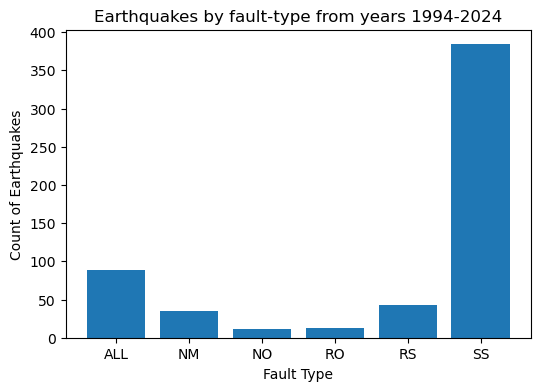

<Figure size 640x480 with 0 Axes>

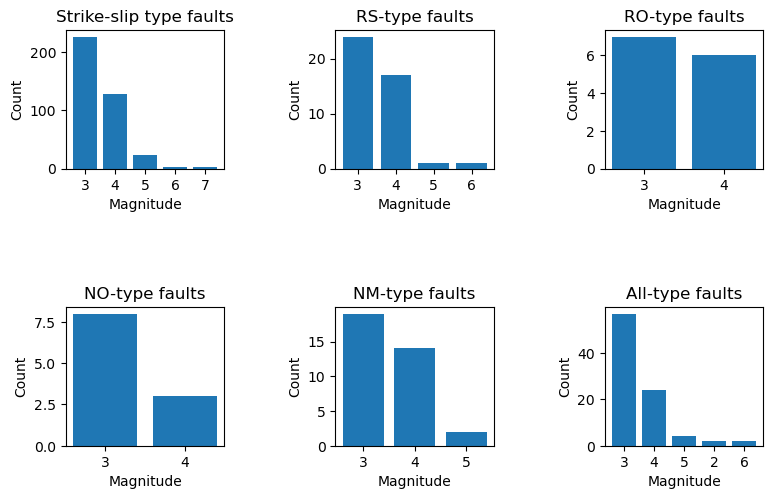

In [188]:
#showing magnitudes by fault type
print('Recorded Earthquakes with fault type data are between the years :' + str(quakes_faults.Year.min()) +'-' + str(quakes_faults.Year.max()))

fault_quake_count = quakes_faults.groupby('faultType').faultType.value_counts()
print(fault_mag_count)

SS_mag_count = quakes_faults.Mag_groups[(quakes_faults['faultType'] == 'SS')].value_counts()
RS_mag_count = quakes_faults.Mag_groups[(quakes_faults['faultType'] == 'RS')].value_counts()
RO_mag_count = quakes_faults.Mag_groups[(quakes_faults['faultType'] == 'RO')].value_counts()
NO_mag_count = quakes_faults.Mag_groups[(quakes_faults['faultType'] == 'NO')].value_counts()
NM_mag_count = quakes_faults.Mag_groups[(quakes_faults['faultType'] == 'NM')].value_counts()
ALL_mag_count = quakes_faults.Mag_groups[(quakes_faults['faultType'] == 'ALL')].value_counts()

plt.figure(figsize = (6,4))

ay1 = plt.subplot()
plt.bar(fault_quake_count.index, fault_quake_count.values)
plt.title('Earthquakes by fault-type from years 1994-2024')
plt.xlabel('Fault Type')
plt.ylabel('Count of Earthquakes')

plt.show()
plt.clf()

plt.figure(figsize = (9,9))

ay2 = plt.subplot(3,3,1)
plt.bar(SS_mag_count.index, SS_mag_count.values)
plt.title('Strike-slip type faults')
plt.xlabel('Magnitude')
plt.ylabel('Count')

ay2 = plt.subplot(3,3,2)
plt.bar(RS_mag_count.index, RS_mag_count.values)
plt.title('RS-type faults')
plt.xlabel('Magnitude')
plt.ylabel('Count')

ay2 = plt.subplot(3,3,3)
plt.bar(RO_mag_count.index, RO_mag_count.values)
plt.title('RO-type faults')
plt.xlabel('Magnitude')
plt.ylabel('Count')

ay2 = plt.subplot(3,3,4)
plt.bar(NO_mag_count.index, NO_mag_count.values)
plt.title('NO-type faults')
plt.xlabel('Magnitude')
plt.ylabel('Count')

ay2 = plt.subplot(3,3,5)
plt.bar(NM_mag_count.index, NM_mag_count.values)
plt.title('NM-type faults')
plt.xlabel('Magnitude')
plt.ylabel('Count')

ay2 = plt.subplot(3,3,6)
plt.bar(ALL_mag_count.index, ALL_mag_count.values)
plt.title('All-type faults')
plt.xlabel('Magnitude')
plt.ylabel('Count')

plt.subplots_adjust(wspace=0.7)
plt.subplots_adjust(hspace=1)
plt.show()

                     Earthquake_Name  latitude  longitude  Magnitude  \
0  Aguanga Earthquake of 01 Apr 2018   33.4925  -116.8045        3.4   
1  Aguanga Earthquake of 01 Sep 2018   33.4878  -116.8065        3.1   
2  Aguanga Earthquake of 03 May 2017   33.4838  -116.8010        3.4   
3  Aguanga Earthquake of 09 Dec 2017   33.4987  -116.8007        3.5   
4  Aguanga Earthquake of 14 Aug 2018   33.4772  -116.8033        4.4   

     Origin Time (UTC) Seismic network faultType Country State  num_records  \
0  2018-04-02 02:53:54              ci        SS      US    CA           13   
1  2018-09-01 16:50:29              ci        SS      US    CA            1   
2  2017-05-03 15:44:55              ci        SS      US    CA           21   
3  2017-12-09 20:45:24              ci        SS      US    CA            3   
4  2018-08-15 01:24:26              ci        SS      US    CA           45   

        Name_of_quake     Day_long Month  Year Day    Region Mag_groups  
0  Aguanga Earthqu

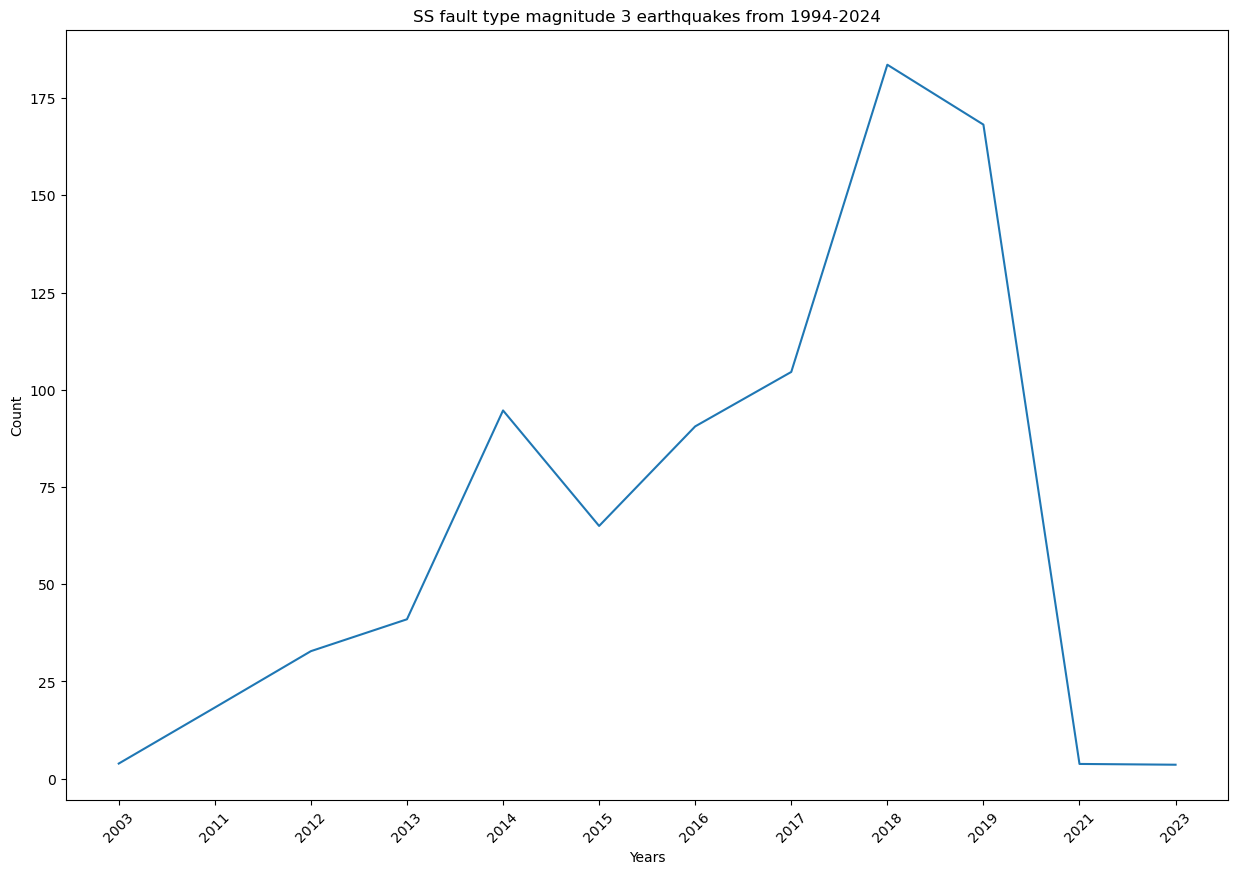

In [200]:
#showing correlation between ss fault types and magnitude over time
ss_faults = quakes_faults[(quakes_faults['faultType'] == 'SS')]
print(ss_faults.head())

ss_mag_3 = ss_faults[(ss_faults['Mag_groups'] == '3')]

fault_quake_count = quakes_faults.groupby('faultType').faultType.value_counts()
ss_yearly_count = ss_mag_3.groupby('Year')['Magnitude'].sum()

plt.figure(figsize = (15,10))
az1 = plt.subplot(1,1,1)
plt.plot(ss_yearly_count.index, ss_yearly_count.values)
plt.title('SS fault type magnitude 3 earthquakes from 1994-2024')
plt.xlabel('Years')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#sns.scatterplot(x=sorted(ss_faults.Year), y=ss_faults.Magnitude, hue = 'Mag_groups', data=ss_faults)
#plt.xticks(rotation=45)
#plt.show()


**Conclusions:**<br>

Earthquakes over time:<br>
-Although from the line-graph of earthquakes in California over time shows an increase in earthquakes over time. Seismology equipment and stations improved and increased over time which could lend to the increase in seismic events.<br>
&nbsp;&nbsp;&nbsp;&nbsp;-To this end, fault-types did not begin to be recorded until 1994 which could have been around the time of a technological leap.<br>
-The amount of recorded earthquakes between the different regions is somewhat similar with Northern California having the most of any region and having more higher magnitude events than the other regions.<br>
-Map of earthquakes over the time period can be seen on a map [here](https://public.tableau.com/authoring/Cali-Earthquake_events1925-20256-5-25/Sheet1#1) created with tableau.<br>

Earthquakes by fault-types:<br>
-Of the different fault-types, earthquakes were more prevalent over Strike-slip fault types.<br>
-Given the stark difference in amount of earthquakes originating on Strike-slip fault types, one could surmise that the chance of experiencing an earthquake over this kind of fault type is more probable.
-Although the amount of SS fault type earthquakes were trending to increasing year over year since fault types were being recorded, the dramatic decrease in the amount after 2019 would need some investigation.<br>
-Given the p-value of almost 1.0 there is not enough evidence to conclude fault types and magnitudes of earthquakes are not significantly associated.<br>

More analysis to do:<br>
-Correlate yearly average magnitudes with another climate data points such as temperature, rainfall, wind, to see if there are any correlations between other natural weather events. <br>
-Anthropogenic events could also be taken into account to find any correlations.<br>